In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style for consistency
sns.set(style="whitegrid")

# Read data
df = pd.read_csv("../input/used-car/vehicles.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-nu

In [17]:
# Check for missing values in the dataset
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [18]:
# Drop columns with too many missing values (>50%)
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values for numerical columns with the median
df['year'].fillna(df['year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)

# Fill missing categorical values with the most common category (mode)
categorical_cols = ['manufacturer', 'model', 'fuel', 'transmission', 'title_status']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing paint color with "unknown"
df['paint_color'].fillna("unknown", inplace=True)

# Drop remaining rows with critical missing values
df = df.dropna()

# Verify no missing values remain
print("Missing Values After Cleaning:\n", df.isnull().sum())


<ipython-input-18-b7955dd613c4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
<ipython-input-18-b7955dd613c4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Missing Values After Cleaning:
 id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


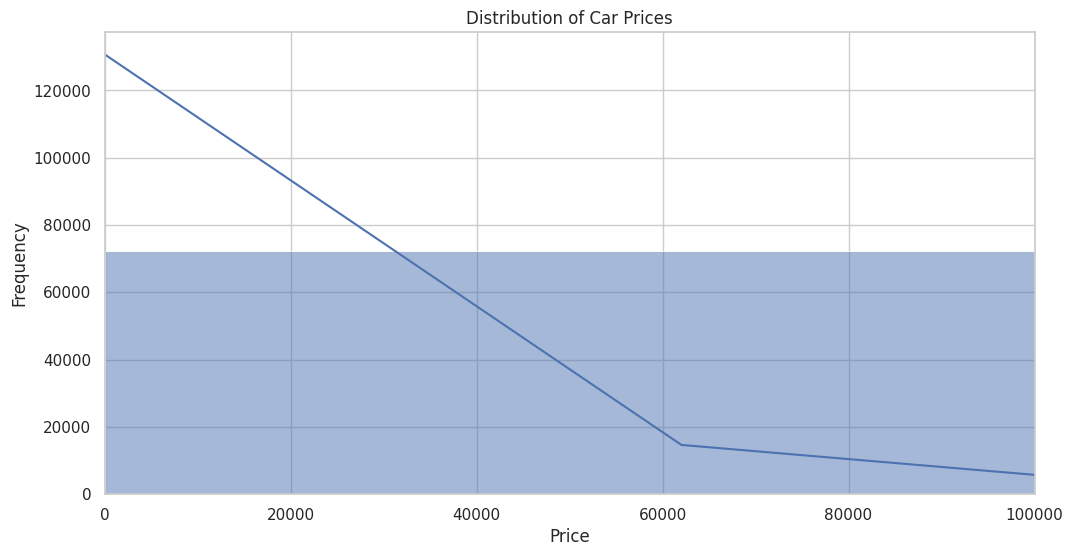

In [19]:
# Distribution of car prices
plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=100, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 100000)  # Exclude extreme outliers for better visualization
plt.show()

In [20]:
# Remove listings with unreasonable price values (e.g., price = 0 or extreme values)
df = df[(df["price"] > 100) & (df["price"] < 100000)]



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


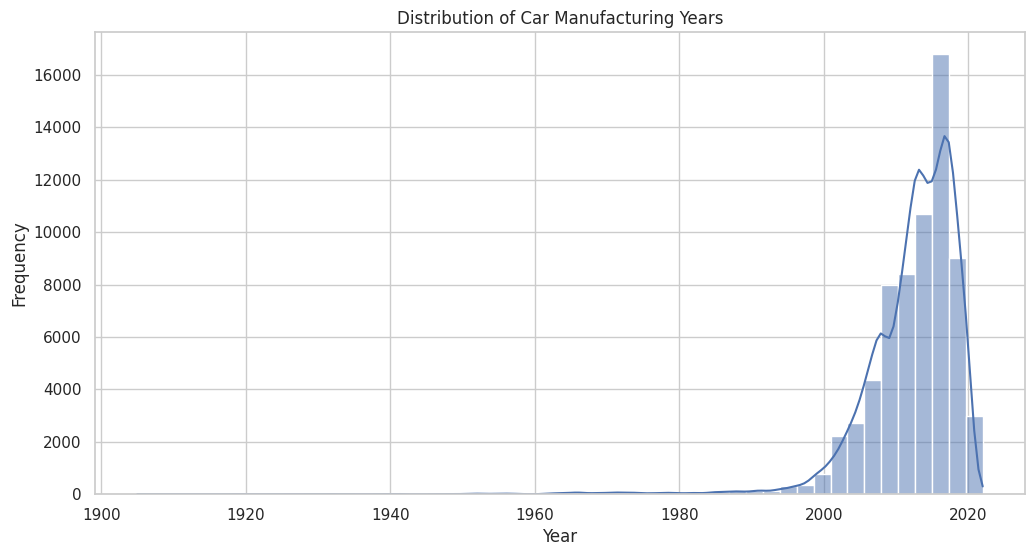

In [21]:
# Distribution of car manufacturing years
plt.figure(figsize=(12, 6))
sns.histplot(df["year"].dropna(), bins=50, kde=True)
plt.title("Distribution of Car Manufacturing Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()


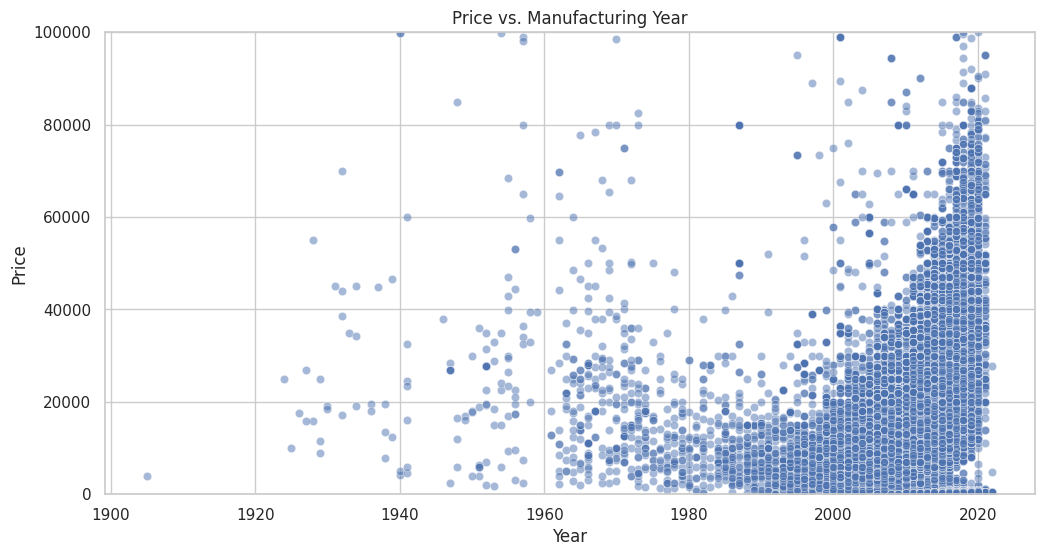

In [22]:
# Relationship between car price and manufacturing year
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["year"], y=df["price"], alpha=0.5)
plt.title("Price vs. Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.ylim(0, 100000)  # Exclude extreme values
plt.show()

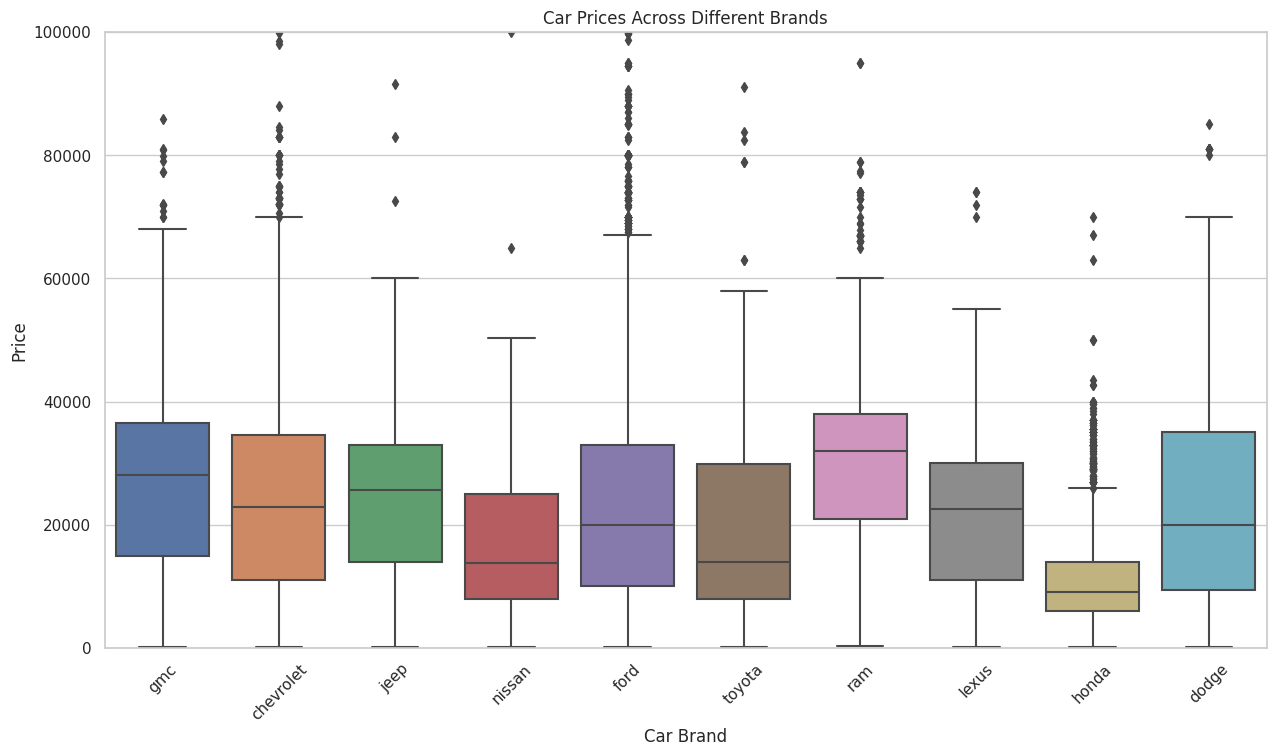

In [23]:
# Boxplot for price distribution across car brands
plt.figure(figsize=(15, 8))
top_brands = df["manufacturer"].value_counts().index[:10]
df_top_brands = df[df["manufacturer"].isin(top_brands)]
sns.boxplot(x="manufacturer", y="price", data=df_top_brands)
plt.title("Car Prices Across Different Brands")
plt.xlabel("Car Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.ylim(0, 100000)  # Exclude extreme values
plt.show()

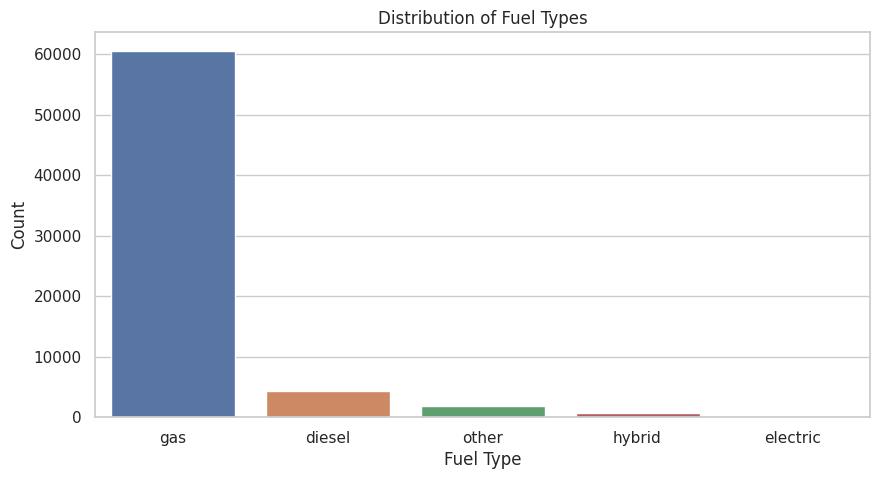

In [24]:
# Fuel type distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="fuel", order=df["fuel"].value_counts().index)
plt.title("Distribution of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

In [31]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Engineering - Creating new meaningful features

# Create a new feature: Car Age (from year)
df["car_age"] = 2025 - df["year"]

# Create a mileage per year feature (assuming a car should have some miles every year)
df["mileage_per_year"] = df["odometer"] / df["car_age"]
df["mileage_per_year"] = df["mileage_per_year"].replace([np.inf, -np.inf], np.nan)
df["mileage_per_year"] = df["mileage_per_year"].fillna(df["mileage_per_year"].median())

# Encoding categorical variables using Label Encoding
encoder = LabelEncoder()
categorical_cols = ['manufacturer', 'model', 'fuel', 'transmission', 'paint_color', 'drive', 'type']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Standardize numerical features to improve model performance
scaler = StandardScaler()
df[['odometer', 'mileage_per_year']] = scaler.fit_transform(df[['odometer', 'mileage_per_year']])

# Save the cleaned and preprocessed dataset
df.to_csv("/kaggle/working/cleaned_vehicles.csv", index=False)

# Display final dataset information
print("\nFinal Dataset Information:")
print(df.info())
print("\nData preprocessing and feature engineering completed successfully!")
print("The cleaned dataset has been saved as 'cleaned_vehicles.csv'.")


Final Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 67641 entries, 32 to 426878
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                67641 non-null  int64  
 1   url               67641 non-null  object 
 2   region            67641 non-null  object 
 3   region_url        67641 non-null  object 
 4   price             67641 non-null  int64  
 5   year              67641 non-null  float64
 6   manufacturer      67641 non-null  int64  
 7   model             67641 non-null  int64  
 8   condition         67641 non-null  object 
 9   cylinders         67641 non-null  object 
 10  fuel              67641 non-null  int64  
 11  odometer          67641 non-null  float64
 12  title_status      67641 non-null  object 
 13  transmission      67641 non-null  int64  
 14  VIN               67641 non-null  object 
 15  drive             67641 non-null  int64  
 16  type           